[344.94589044 309.15306967 468.75479798]
[343.16279881 343.90971815 467.8487928 ]
[367.04970166 391.15805576 447.72939459]
[397.63267463 383.51103046 436.97438736]
[[344.94589044 309.15306967 468.75479798]
 [343.16279881 343.90971815 467.8487928 ]
 [367.04970166 391.15805576 447.72939459]
 [397.63267463 383.51103046 436.97438736]]
iteration: 1
2478535.8506644536
iteration: 2
1882516.9014601833
iteration: 3
1758673.8911964775
iteration: 4
1696957.618232275
iteration: 5
1665157.9518082514
iteration: 6
1645892.1473903353
iteration: 7
1631360.205295026
iteration: 8
1619106.3958169431
iteration: 9
1608178.0405029578
iteration: 10
1598721.9420601088
iteration: 11
1590120.5029505503
iteration: 12
1581779.478074855
iteration: 13
1573431.257609465
iteration: 14
1565274.33294195
iteration: 15
1560227.0735678298
iteration: 16
1555531.5663295153
iteration: 17
1552647.0887193512
iteration: 18
1550401.7683342868
iteration: 19
1548065.1019209928
iteration: 20
1545309.8348590448
iteration: 21
1541399.

<IPython.core.display.Javascript object>


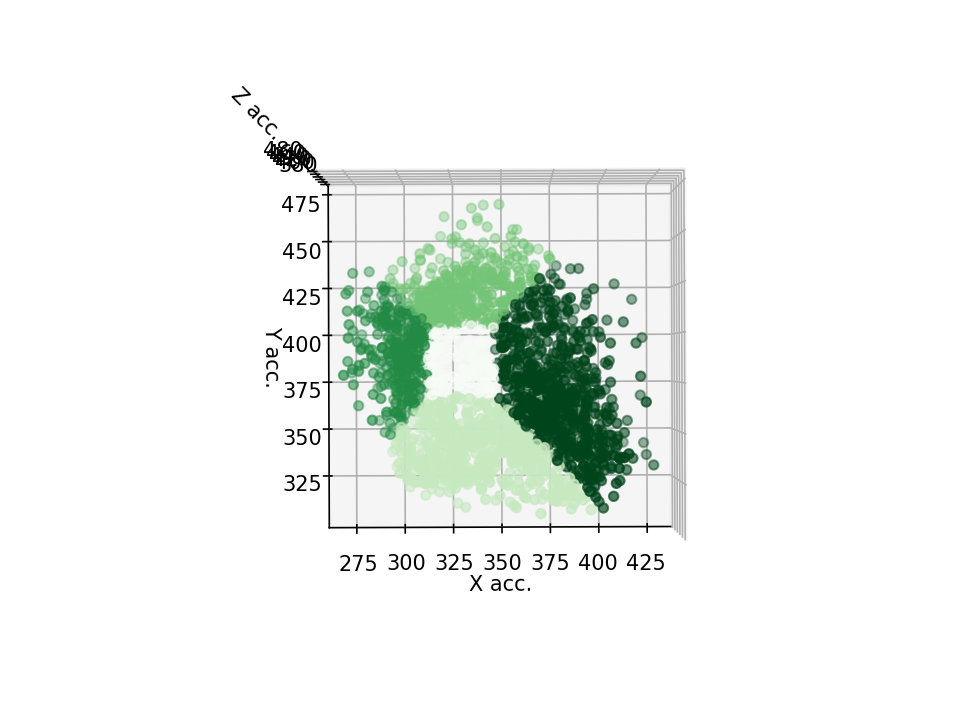

<IPython.core.display.Javascript object>


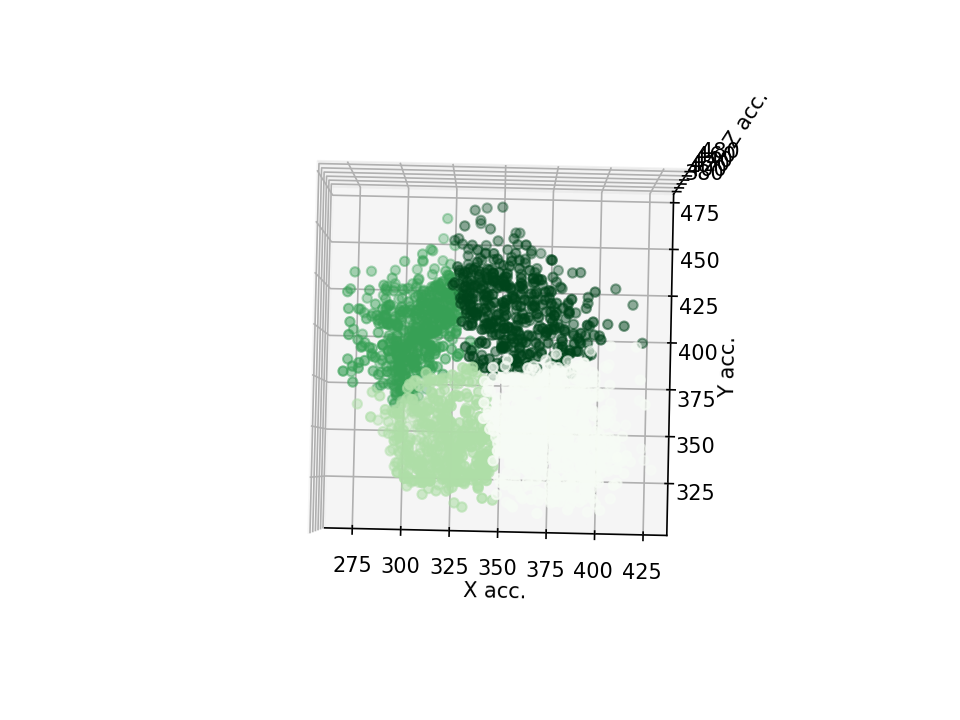

"\nnp.savetxt('Y_tr.txt', Y_tr)\nnp.savetxt('Y_tr_k_means.txt', Y_tr_k_means)\n\nX_tr = X_tr[:,3:]\nX_tr = X_tr/X_tr.max()\nsoftmax.train(X_tr, Y_tr, 3)\n"

In [6]:
from stanford_cs229.modeling.softmax import SoftmaxRegression
from stanford_cs229.modeling.k_means import KMeans
from stanford_cs229.utils.util import load_our_data, plot
from stanford_cs229.utils.csv_plotter_classifier import format_data

import numpy as np

import matplotlib.pyplot as plt
from importlib import reload
reload(plt)
%matplotlib notebook

softmax = SoftmaxRegression(lr=0.01, max_iter=1000)

X_tr = load_our_data('stanford_cs229/data/circles_overhand_weight-60.csv')
Y_tr = format_data(X_tr)

k_means = KMeans(verbose=True)
Y_tr_k_means = k_means.assign(X_tr,4,random=True) # Use hard-coded centroid initializations

print(Y_tr)
print(Y_tr_k_means)


fig1 = plt.figure(0)
ax1 = plt.axes(projection='3d')
ax1.scatter3D(X_tr[:,0], X_tr[:,1], X_tr[:,2], c=Y_tr*40, cmap='Greens')

ax1.set_xlabel('X acc.')
ax1.set_ylabel('Y acc.')
ax1.set_zlabel('Z acc.')

"""
plt.figure(0) 
plt.plot(Y_tr)
plt.savefig('manual_labeling.png', dpi=300)
plt.figure(1) 
plt.plot(Y_tr_k_means)
plt.savefig('k_means_labeling.png', dpi=300)
"""
fig2 = plt.figure(1)
ax2 = plt.axes(projection='3d')
ax2.scatter3D(X_tr[:,0], X_tr[:,1], X_tr[:,2], c=Y_tr_k_means*40, cmap='Greens')
ax2.set_xlabel('X acc.')
ax2.set_ylabel('Y acc.')
ax2.set_zlabel('Z acc.')

#print(len(X_tr[:,0]))
#print(sum(Y_tr!=Y_tr_k_means))
"""
np.savetxt('Y_tr.txt', Y_tr)
np.savetxt('Y_tr_k_means.txt', Y_tr_k_means)

X_tr = X_tr[:,3:]
X_tr = X_tr/X_tr.max()
softmax.train(X_tr, Y_tr, 3)
"""

In [ ]:
Y_pred = softmax.predict(X_tr)
accuracy = np.sum(Y_pred == Y_tr) / Y_tr.size
accuracy